In [1]:
import sys
import os
# Add the directory containing 'thesis_utils.py' to the system path
sys.path.append(os.path.abspath('..'))  # If 'thesis_utils.py' is one level up
# Or use this if it's in the same directory as the notebook:
# sys.path.append(os.getcwd())
# os.environ["JULIA_NUM_THREADS"] = "8" 
os.environ["PYTHON_JULIACALL_HANDLE_SIGNALS"] = "yes"
os.environ["PYTHON_JULIACALL_THREADS"] = "auto"
os.environ["PYTHON_JULIACALL_OPTLEVEL"] = "3"
from pysr import PySRRegressor
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

from thesis_utils import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [ ]:
import importlib
import thesis_utils  # or whatever your module is called

importlib.reload(thesis_utils)

from thesis_utils import *

In [2]:
data = pd.read_csv("data/insurance_original.csv")
# encode categorical column 'smoker' with only two categories to numerical representation as this one is highly correlated with 'charges' column
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [3]:
# Generate the profiling report
profile_full = ProfileReport(data, title="Insurance", explorative=True)

# Display the report in the notebook
profile_full.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 243.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# variable assignment according to correlation structure
independents_lst = ['age', 'smoker']
dependent_var = 'charges'
X = data[independents_lst].to_numpy()
y = data[dependent_var].to_numpy()

20250423_092221_SYCa5E

256 iterations, length_scale_bounds=(1e-3, 30), noise_level_bounds=(1e-5, 1e3)

20250423_093032_9RtTy9

1024 iterations, length_scale_bounds=(1e-3, 30), noise_level_bounds=(1e-5, 1e3)

20250423_100258_eZjRU9

1024 iterations, no denoising



316**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=1e+03)


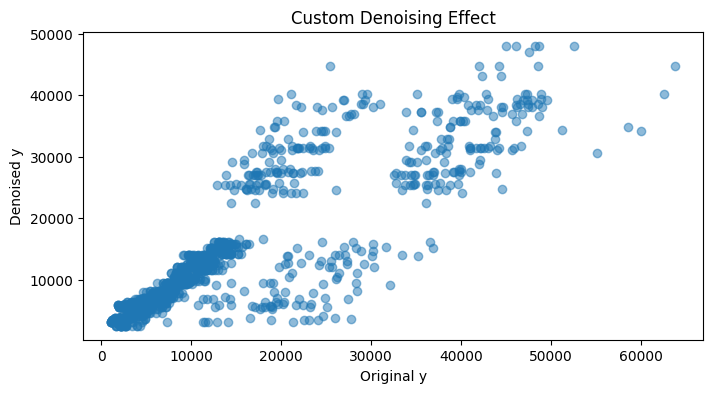

In [5]:
%matplotlib inline
y_denoised = bound_denoise(X, y, length_scale_bounds=(1e-3, 30), noise_level_bounds=(1e-5, 1e3), show_denoising_effect=True)

In [6]:
data_denoised = data.copy()
data_denoised['charges'] = y_denoised
data_denoised.to_csv('data/insurance_original_denoised.csv', index=False)

In [7]:
sr_model = PySRRegressor(
        niterations=1024,  # Number of iterations to search for equations
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["log", "abs", "sqrt"],
        maxdepth=10,
        elementwise_loss="loss(x, y) = (x - y)^2",  # Define loss function (mean squared error)
        verbosity=0,
        maxsize=50
    )
sr_model.fit(X, y_denoised)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         13255.6045   
	1         0.184522                                     x1 * 31993.586   
	2         0.681542                        (x1 * 23563.297) + 8430.346   
	3         0.659072                (x0 * 222.38312) + (x1 * 23428.639)   
	4   >>>>  0.067038           (x0 * (x0 - -173.172)) + (x1 * 23647.43)   
	5         0.015362    (x1 * 23738.22) - ((log(x0) * -57.657394) * x0)   
	6         0.033326  ((x1 * 23815.557) - (x0 * (x0 * -3.4542909))) ...   
	7         0.000912  (x1 * 23681.793) - ((x0 * ((x1 + x0) * -3.4466...   
	8         0.004420  (x1 * 23011.33) - ((x0 * (((x1 * -0.47522765) ...   
	9         0.038908  ((2840.8481 / (x0 + -21.600563)) + ((x0 * x0) ...   
	10        0.019179  (x1 + ((0.009231464 * x0) + (0.1600355 / ((x0 ...   
	11        0.006692  ((((x1 / (x0 + -21.6902)) * 2898.2322) - -2175...   
	12        0.007165  (((x0 * x0) + ((x1 * 2898.2217) / (x0 + -21.68...   
	13        0.009068  (((x1 + (x0 * 0.014270379)) + -0.33778852) * (...   
	14        0.001454  ((-0.33969826 + (x1 + (0.014340474 * x0))) * (...   
	15        0.000796  (-4.180311 / (((x0 - x1) - x1) / -23349.906)) ...   
	16        0.002015  ((((4128.711 / (-21.595102 + x0)) + (50.506027...   
	17        0.002405  ((((x0 * 0.015850352) + x1) + -0.38124982) * (...   
	18        0.004103  (1175.2035 / ((((x1 * 6.702584) + x0) * ((x0 +...   
	19        0.000209  abs((1175.2035 / (((x0 + (x1 * 6.7025867)) * (...   
	20        0.017823  (1165.8441 / (0.019086622 * (x0 + (x1 / ((-23....   
	21        0.022975  (1165.5277 / ((x0 + (x1 / ((-23.467226 / x0) +...   
	22        0.002385  (((5137.2393 / (x0 + -21.47804)) + ((x0 * 283....   
	23        0.000886  ((x1 + (-0.23551974 + (x0 * 0.012947754))) * (...   
	24        0.002986  (((x1 + -0.23551974) + (x0 * 0.012947754)) * (...   
	25        0.000044  (1190.23 / (((x0 - abs(-0.8432144)) + (x1 / ((...   
	26        0.000369  (1190.23 / (0.019093366 * (((x0 - x1) + -0.235...   
	27        0.001200  (((x1 + -0.23551974) + (x0 * 0.012947754)) * (...   
	
	           loss  complexity  
	0   109850776.0           1  
	1    75950296.0           3  
	2    19433446.0           5  
	3     5201006.0           7  
	4     4548402.5           9  
	5     4479065.5          10  
	6     4332257.0          11  
	7     4324362.5          13  
	8     4286301.5          15  
	9     3965407.0          17  
	10    3816185.5          19  
	11    3765447.8          21  
	12    3711875.2          23  
	13    3645164.5          25  
	14    3634580.8          27  
	15    3628797.2          29  
	16    3614199.5          31  
	17    3596854.2          33  
	18    3567461.8          35  
	19    3566717.5          36  
	20    3503712.0          37  
	21    3424132.0          38  
	22    3415976.0          39  
	23    3412949.2          40  
	24    3402772.0          41  
	25    3402622.8          42  
	26    3401366.5          43  
	27    3397286.8          44  
]

In [8]:
# 20250502_084727_jOOLoY
# Complexity 7
candidate_function = generate_candidate_function("(x0 * 222.38312) + (x1 * 23428.639)")

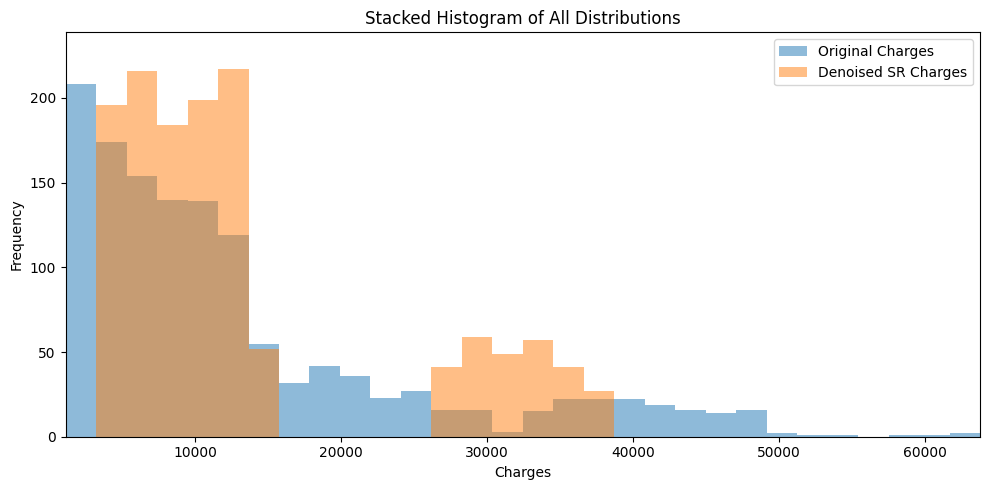

In [9]:
y_denoised_sr = candidate_function(X)
plot_histograms([(y, 'Original Charges', None), (y_denoised_sr, 'Denoised SR Charges', None)], 'Charges', stack=True, figsize_per_plot=(10, 5))

<Figure size 640x480 with 0 Axes>

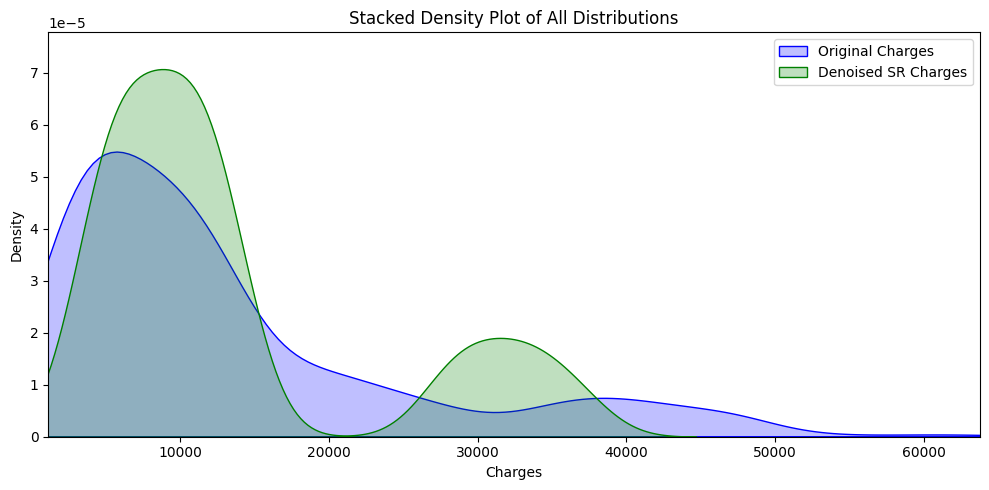

In [10]:
plot_densities([(y, 'Original Charges', 'blue'), (y_denoised_sr, 'Denoised SR Charges', 'green')], 'Charges', stack=True, figsize_per_plot=(10, 5))

In [11]:
orig_residuals = y - y_denoised_sr

In [12]:
y_corrected, best_amp, errors, _ = renoise_predictions(y, y_denoised_sr, method='stratified', seed=42, clip_lower=0, clip_upper=None, original_residuals=None, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run

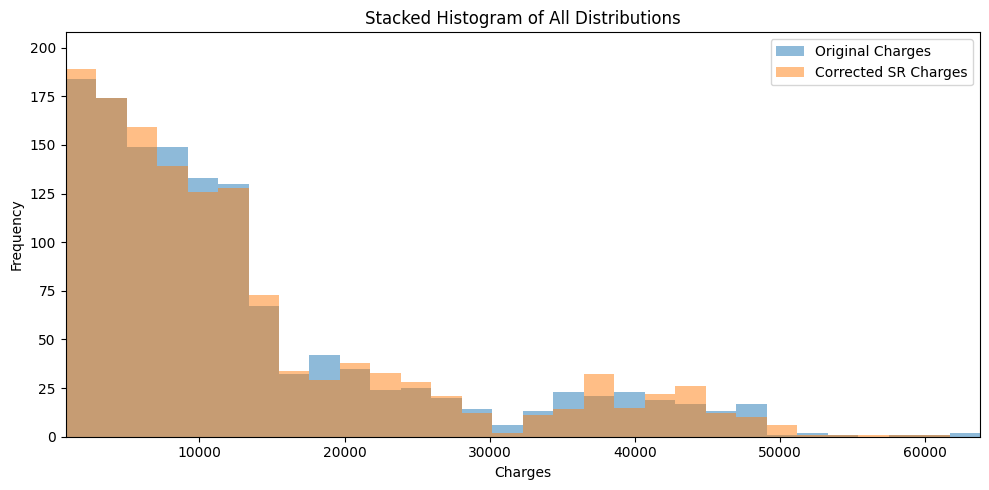

In [13]:
plot_histograms([(y, 'Original Charges', None), (y_corrected, 'Corrected SR Charges', None)], 'Charges', stack=True, figsize_per_plot=(10, 5))

<Figure size 640x480 with 0 Axes>

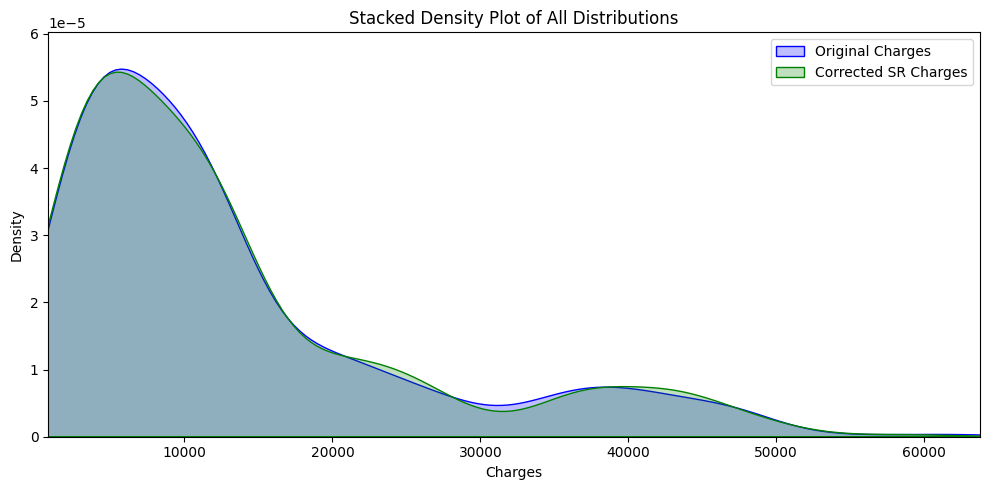

In [14]:
plot_densities([(y, 'Original Charges', 'blue'), (y_corrected, 'Corrected SR Charges', 'green')], 'Charges', stack=True, figsize_per_plot=(10, 5))

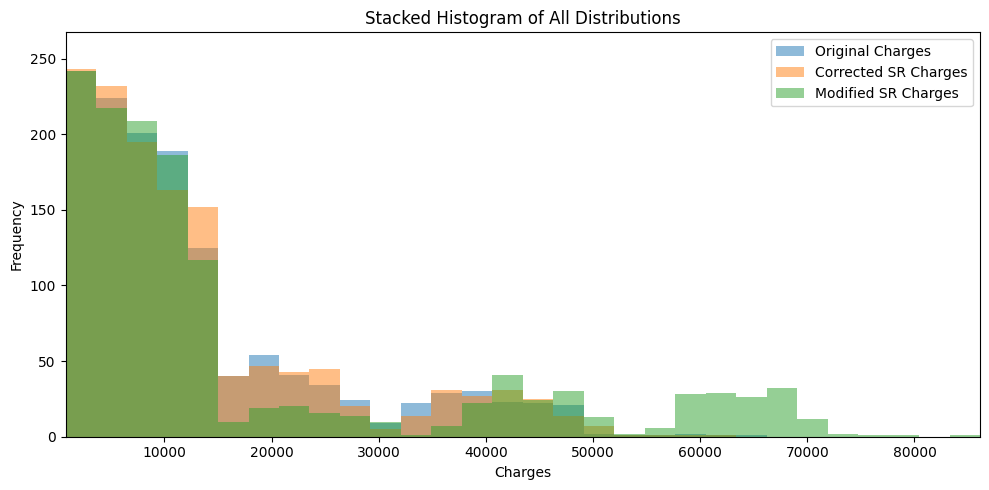

In [16]:
mod_candidate_function = generate_candidate_function("(x0 * 222.38312) + (2*x1 * 23428.639)")
mod_y_sr = mod_candidate_function(X)
mod_y_corrected, best_amp, errors, _ = renoise_predictions(y, mod_y_sr, method='stratified', amplification_factor=1.0, seed=42, clip_lower=0, clip_upper=None, original_residuals=orig_residuals, tail_replace=True, lower_percentile=50)
# ignore error in orig_residuals after first run
plot_histograms([(y, 'Original Charges', None), (y_corrected, 'Corrected SR Charges', None), (mod_y_corrected, 'Modified SR Charges', None)], 'Charges', stack=True, figsize_per_plot=(10, 5))